## Загрузка данных

https://drive.google.com/file/d/1Ox0V-vE6oXaBpGgAHfy5spc3hIPkZEbu/view?usp=sharing

In [514]:
! gdown 1Ox0V-vE6oXaBpGgAHfy5spc3hIPkZEbu

Downloading...
From: https://drive.google.com/uc?id=1Ox0V-vE6oXaBpGgAHfy5spc3hIPkZEbu
To: /content/merc.csv
100% 741k/741k [00:00<00:00, 24.1MB/s]


In [515]:
import pandas as pd

In [516]:
df = pd.read_csv('/content/merc.csv')

In [517]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [518]:
df.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [519]:
df['price'].mean()

24698.596920496988

## Определение выборок

In [520]:
from sklearn.model_selection import train_test_split

In [521]:
train, test = train_test_split(df, train_size=0.6, random_state=10)

In [522]:
val, test = train_test_split(test, train_size=0.5, random_state=10)

In [523]:
len(train) / len(df)

0.5999695098711793

In [524]:
len(test) / len(df)

0.2000152450644104

In [525]:
len(val) / len(df)

0.2000152450644104

In [526]:
train['price'].mean()

24530.236310506923

In [527]:
test['price'].mean()

24969.266387195123

In [528]:
val['price'].mean()

24932.94512195122

## Phik

In [529]:
! pip install phik

In [530]:
import phik

In [531]:
train_full = pd.concat([train, val])

In [532]:
len(train_full) / len(df)

0.7999847549355896

In [533]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [534]:
phik_overview['price'].sort_values(ascending=False)

price           1.000000
model           0.599721
year            0.587389
engineSize      0.570453
mpg             0.532053
mileage         0.434250
transmission    0.407098
tax             0.365096
fuelType        0.190187
Name: price, dtype: float64

## Человеческое обучение. Анализ данных

In [535]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4583,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1
8081,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0
179,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1
7831,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0
10086,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5
...,...,...,...,...,...,...,...,...,...
8117,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
9821,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1
106,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0


In [536]:
train_full['score_mean'] = train_full['price'].mean()

In [537]:
train_full.groupby('year')['price'].agg(['count', 'mean'])
# сильно несбалансированные данные. Много данных, начиная с 2013 года.
# Начиная с 2013 года цена на автомобили увеличивалась.

,count,mean
year,,
1970,1,24999.000000
1997,1,9995.000000
1998,3,7990.000000
1999,1,5995.000000
2000,3,5743.333333
2001,9,5065.444444
2002,8,6174.250000
2003,6,5128.333333
2004,12,4973.250000


In [538]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: xlabel='year'>

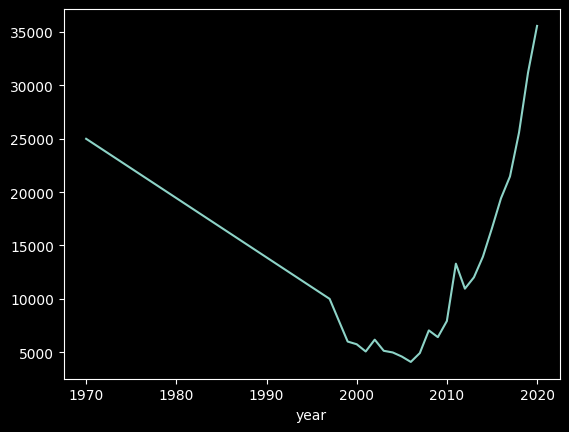

In [539]:
train_full.groupby('year')['price'].mean().plot()

In [540]:
train_full['year_group'] = pd.cut(train_full['year'],
 [-float('inf'), 2012, 2014, 2016, 2018, float('inf')])
# разбиваем данные на интервалы, чтобы получить более наглядную картину
# по средней цене

In [541]:
train_full.groupby('year_group')['price'].agg(['count', 'mean'])

,count,mean
year_group,,
"(-inf, 2012.0]",214,8413.630841
"(2012.0, 2014.0]",622,13219.286174
"(2014.0, 2016.0]",2382,18486.374475
"(2016.0, 2018.0]",3073,23022.929385
"(2018.0, inf]",4204,31801.764748


<Axes: xlabel='year_group'>

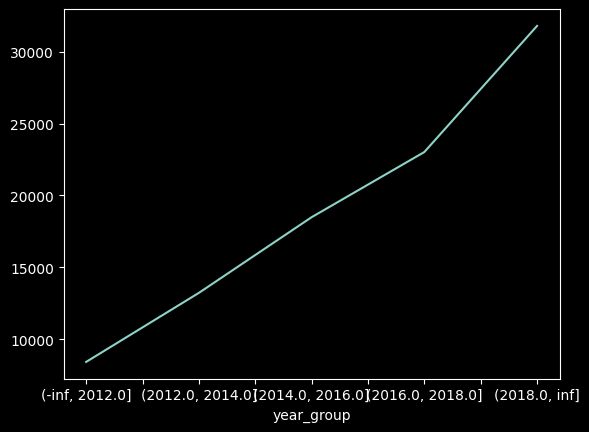

In [542]:
train_full.groupby('year_group')['price'].mean().plot()
# на графике видно, что цена на автомобили с течением времени увеличивалась,
# притом, график имеет линейную зависимость

In [543]:
model = train_full.groupby('year_group')['price'].mean().reset_index()

In [544]:
model = model.rename({'price': 'score_year_group_mean'}, axis=1)

In [545]:
train_full = train_full.merge(model, how='left', on='year_group')

In [546]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475
...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748


In [547]:
train_full.groupby('engineSize')['price'].agg(['count', 'mean'])

,count,mean
engineSize,,
0.0,9,17948.555556
1.3,564,23402.445035
1.4,1,650.000000
1.5,1343,19505.787789
1.6,680,18850.800000
1.7,2,4492.500000
1.8,97,9420.515464
2.0,2986,27592.464836
2.1,3213,19126.325552


<Axes: >

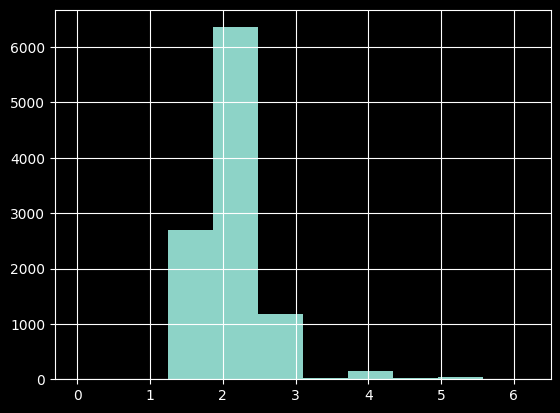

In [548]:
train_full['engineSize'].hist()

In [549]:
train_full['engineSize_group'] = pd.cut(train_full['engineSize'],
 [-float('inf'), 1.5, 2.5, float('inf')])

In [550]:
train_full.groupby('engineSize_group')['price'].agg(['count', 'mean'])
# чем больше объем двигателя, тем стоимость автомобиля выше

,count,mean
engineSize_group,,
"(-inf, 1.5]",1917,20635.075117
"(1.5, 2.5]",7137,22677.310775
"(2.5, inf]",1441,39622.575989


In [551]:
train_full.groupby(['year_group', 'engineSize_group'])['price'].agg(['count', 'mean'])

count          mean
year_group       engineSize_group                     
(-inf, 2012.0]   (-inf, 1.5]          10   6391.700000
                 (1.5, 2.5]          119   6681.159664
                 (2.5, inf]           85  11076.964706
(2012.0, 2014.0] (-inf, 1.5]          73  10176.602740
                 (1.5, 2.5]          484  12830.419421
                 (2.5, inf]           65  19532.015385
(2014.0, 2016.0] (-inf, 1.5]         234  13251.179487
                 (1.5, 2.5]         1837  17575.351116
                 (2.5, inf]          311  27806.585209
(2016.0, 2018.0] (-inf, 1.5]         405  17442.533333
                 (1.5, 2.5]         2302  21498.758036
                 (2.5, inf]          366  38784.412568
(2018.0, inf]    (-inf, 1.5]        1195  23921.027615
                 (1.5, 2.5]         2395  30508.110647
                 (2.5, inf]          614  52185.775244

<Axes: xlabel='year_group,engineSize_group'>

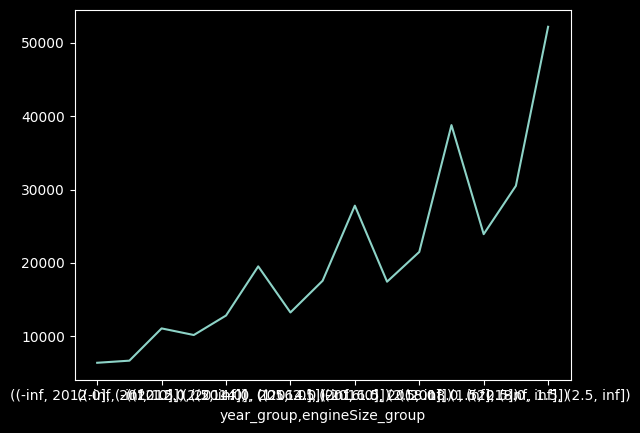

In [552]:
train_full.groupby(['year_group', 'engineSize_group'])['price'].mean().plot()

In [553]:
model = train_full.groupby(['year_group',
                            'engineSize_group'])['price'].mean().reset_index()

In [554]:
model = model.rename({'price': 'score_year_group_engineSize_group_mean'},
                     axis=1)

In [555]:
model

,year_group,engineSize_group,score_year_group_engineSize_group_mean
0,"(-inf, 2012.0]","(-inf, 1.5]",6391.700000
1,"(-inf, 2012.0]","(1.5, 2.5]",6681.159664
2,"(-inf, 2012.0]","(2.5, inf]",11076.964706
3,"(2012.0, 2014.0]","(-inf, 1.5]",10176.602740
4,"(2012.0, 2014.0]","(1.5, 2.5]",12830.419421
5,"(2012.0, 2014.0]","(2.5, inf]",19532.015385
6,"(2014.0, 2016.0]","(-inf, 1.5]",13251.179487
7,"(2014.0, 2016.0]","(1.5, 2.5]",17575.351116
8,"(2014.0, 2016.0]","(2.5, inf]",27806.585209
9,"(2016.0, 2018.0]","(-inf, 1.5]",17442.533333


In [556]:
train_full = train_full.merge(model, how='left',
                              on=['year_group', 'engineSize_group'])

In [557]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean,engineSize_group,score_year_group_engineSize_group_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174,"(1.5, 2.5]",12830.419421
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475,"(1.5, 2.5]",17575.351116
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475,"(-inf, 1.5]",13251.179487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748,"(-inf, 1.5]",23921.027615
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748,"(2.5, inf]",52185.775244
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385,"(1.5, 2.5]",21498.758036
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647


In [558]:
train_full.groupby('model')['price'].agg(['count', 'mean'])

,count,mean
model,,
A Class,2043,19596.943710
B Class,471,18899.798301
C Class,3016,23677.125332
CL Class,413,21510.249395
CLA Class,68,21523.500000
CLC Class,3,5516.666667
CLK,6,3028.166667
CLS Class,192,26842.135417
E Class,1543,25457.826312


In [559]:
model = train_full.groupby('model')['price'].mean().reset_index()

In [560]:
model = model.rename({'price': 'score_model_mean'}, axis=1)

In [561]:
train_full = train_full.merge(model, how='left', on='model')

In [562]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean,engineSize_group,score_year_group_engineSize_group_mean,score_model_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174,"(1.5, 2.5]",12830.419421,23677.125332
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,21510.249395
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475,"(1.5, 2.5]",17575.351116,23677.125332
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,31420.321839
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475,"(-inf, 1.5]",13251.179487,18899.798301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748,"(-inf, 1.5]",23921.027615,23677.125332
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748,"(2.5, inf]",52185.775244,19596.943710
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385,"(1.5, 2.5]",21498.758036,23677.125332
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,23677.125332


In [563]:
train_full.groupby('mpg')['price'].agg(['count', 'mean'])

,count,mean
mpg,,
1.1,4,31465.500000
11.0,1,102502.000000
17.8,1,3495.000000
19.0,1,18975.000000
19.8,1,14995.000000
...,...,...
122.9,1,56499.000000
134.5,69,18424.927536
176.6,4,41045.750000


<Axes: >

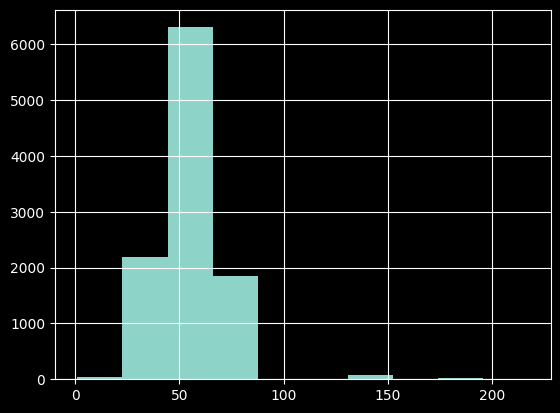

In [564]:
train_full['mpg'].hist()

In [565]:
train_full['mpg_group'] = pd.cut(train_full['mpg'],
 [-float('inf'), 40, 50, 60, 70, float('inf')])

In [566]:
train_full.groupby('mpg_group')['price'].agg(['count', 'mean'])
# чем показатель ниже (расход топлива больше), тем стоимость автомобиля выше

,count,mean
mpg_group,,
"(-inf, 40.0]",1390,39579.620144
"(40.0, 50.0]",2318,27336.776531
"(50.0, 60.0]",2708,22716.781019
"(60.0, 70.0]",3114,19287.786448
"(70.0, inf]",965,19212.443523


In [567]:
train_full.groupby(['mpg_group', 'engineSize_group'])['price'].agg(['count',
                                                                    'mean'])

count          mean
mpg_group    engineSize_group                     
(-inf, 40.0] (-inf, 1.5]          87  21530.781609
             (1.5, 2.5]          434  31587.737327
             (2.5, inf]          869  45377.924051
(40.0, 50.0] (-inf, 1.5]         681  24756.995595
             (1.5, 2.5]         1307  27200.903596
             (2.5, inf]          330  33198.645455
(50.0, 60.0] (-inf, 1.5]         246  23326.097561
             (1.5, 2.5]         2227  22170.388864
             (2.5, inf]          235  27256.880851
(60.0, 70.0] (-inf, 1.5]         586  18518.974403
             (1.5, 2.5]         2528  19466.000000
             (2.5, inf]            0           NaN
(70.0, inf]  (-inf, 1.5]         317  13357.753943
             (1.5, 2.5]          641  21846.808112
             (2.5, inf]            7  43113.714286

In [568]:
model = train_full.groupby(['mpg_group',
                            'engineSize_group'])['price'].mean().reset_index()

In [569]:
model = model.rename({'price': 'score_mpg_group_engineSize_group_mean'}, axis=1)

In [570]:
model

,mpg_group,engineSize_group,score_mpg_group_engineSize_group_mean
0,"(-inf, 40.0]","(-inf, 1.5]",21530.781609
1,"(-inf, 40.0]","(1.5, 2.5]",31587.737327
2,"(-inf, 40.0]","(2.5, inf]",45377.924051
3,"(40.0, 50.0]","(-inf, 1.5]",24756.995595
4,"(40.0, 50.0]","(1.5, 2.5]",27200.903596
5,"(40.0, 50.0]","(2.5, inf]",33198.645455
6,"(50.0, 60.0]","(-inf, 1.5]",23326.097561
7,"(50.0, 60.0]","(1.5, 2.5]",22170.388864
8,"(50.0, 60.0]","(2.5, inf]",27256.880851
9,"(60.0, 70.0]","(-inf, 1.5]",18518.974403


In [571]:
train_full = train_full.merge(model, how='left', on=['mpg_group',
                                                     'engineSize_group'])

In [572]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean,engineSize_group,score_year_group_engineSize_group_mean,score_model_mean,mpg_group,score_mpg_group_engineSize_group_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174,"(1.5, 2.5]",12830.419421,23677.125332,"(60.0, 70.0]",19466.000000
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,21510.249395,"(-inf, 40.0]",31587.737327
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475,"(1.5, 2.5]",17575.351116,23677.125332,"(60.0, 70.0]",19466.000000
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,31420.321839,"(-inf, 40.0]",31587.737327
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475,"(-inf, 1.5]",13251.179487,18899.798301,"(60.0, 70.0]",18518.974403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748,"(-inf, 1.5]",23921.027615,23677.125332,"(40.0, 50.0]",24756.995595
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748,"(2.5, inf]",52185.775244,19596.943710,"(-inf, 40.0]",45377.924051
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385,"(1.5, 2.5]",21498.758036,23677.125332,"(60.0, 70.0]",19466.000000
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,23677.125332,"(60.0, 70.0]",19466.000000


In [573]:
train_full.groupby('mileage')['price'].agg(['count', 'mean'])

,count,mean
mileage,,
1,1,30995.000000
9,41,33403.658537
10,12,35043.750000
11,1,53980.000000
12,1,58921.000000
...,...,...
166086,1,6775.000000
170000,1,5250.000000
185000,1,3495.000000


<Axes: >

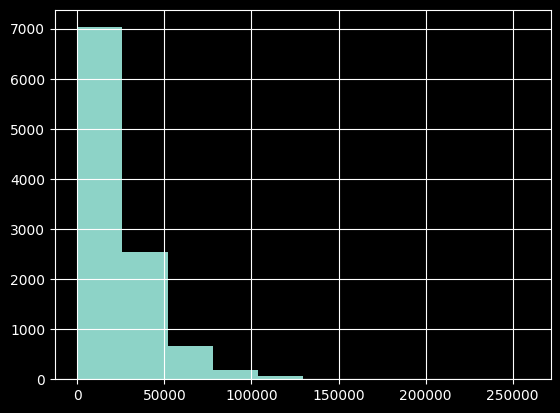

In [574]:
train_full['mileage'].hist()

In [575]:
train_full['mileage_group'] = pd.cut(train_full['mileage'],
 [-float('inf'), 5000, 10000, 30000, 50000, float('inf')])

In [576]:
train_full.groupby('mileage_group')['price'].agg(['count', 'mean'])
# чем меньше пробег, тем цена выше

,count,mean
mileage_group,,
"(-inf, 5000.0]",2265,34933.917439
"(5000.0, 10000.0]",1393,30218.909548
"(10000.0, 30000.0]",3973,22770.131387
"(30000.0, 50000.0]",1868,18183.243041
"(50000.0, inf]",996,12900.847390


In [577]:
train_full.groupby(['year_group', 'mileage_group'])['price'].agg(['count',
                                                                  'mean'])

count           mean
year_group       mileage_group                           
(-inf, 2012.0]   (-inf, 5000.0]          1  149948.000000
                 (5000.0, 10000.0]       0            NaN
                 (10000.0, 30000.0]      6   12130.333333
                 (30000.0, 50000.0]     34   11780.058824
                 (50000.0, inf]        173    6805.000000
(2012.0, 2014.0] (-inf, 5000.0]          1   20495.000000
                 (5000.0, 10000.0]       1   17699.000000
                 (10000.0, 30000.0]     77   15987.493506
                 (30000.0, 50000.0]    244   13711.942623
                 (50000.0, inf]        299   12065.053512
(2014.0, 2016.0] (-inf, 5000.0]          5   35517.600000
                 (5000.0, 10000.0]      40   24899.825000
                 (10000.0, 30000.0]    921   20087.453855
                 (30000.0, 50000.0]    994   18201.811871
                 (50000.0, inf]        422   14852.646919
(2016.0, 2018.0] (-inf, 5000.0]        120   33242.925000
                 (5000.0, 10000.0]     385   27236.428571
                 (10000.0, 30000.0]   1872   22645.794872
                 (30000.0, 50000.0]    594   20344.523569
                 (50000.0, inf]        102   17614.813725
(2018.0, inf]    (-inf, 5000.0]       2138   34980.421422
                 (5000.0, 10000.0]     967   31639.321613
                 (10000.0, 30000.0]   1097   25768.860529
                 (30000.0, 50000.0]      2   21407.000000
                 (50000.0, inf]          0            NaN

In [578]:
model = train_full.groupby(['year_group',
                            'mileage_group'])['price'].mean().reset_index()

In [579]:
model = model.rename({'price': 'score_year_group_mileage_group_mean'}, axis=1)

In [580]:
model

,year_group,mileage_group,score_year_group_mileage_group_mean
0,"(-inf, 2012.0]","(-inf, 5000.0]",149948.000000
1,"(-inf, 2012.0]","(5000.0, 10000.0]",NaN
2,"(-inf, 2012.0]","(10000.0, 30000.0]",12130.333333
3,"(-inf, 2012.0]","(30000.0, 50000.0]",11780.058824
4,"(-inf, 2012.0]","(50000.0, inf]",6805.000000
5,"(2012.0, 2014.0]","(-inf, 5000.0]",20495.000000
6,"(2012.0, 2014.0]","(5000.0, 10000.0]",17699.000000
7,"(2012.0, 2014.0]","(10000.0, 30000.0]",15987.493506
8,"(2012.0, 2014.0]","(30000.0, 50000.0]",13711.942623
9,"(2012.0, 2014.0]","(50000.0, inf]",12065.053512


In [581]:
train_full = train_full.merge(model, how='left', on=['year_group',
                                                     'mileage_group'])

In [582]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean,engineSize_group,score_year_group_engineSize_group_mean,score_model_mean,mpg_group,score_mpg_group_engineSize_group_mean,mileage_group,score_year_group_mileage_group_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174,"(1.5, 2.5]",12830.419421,23677.125332,"(60.0, 70.0]",19466.000000,"(50000.0, inf]",12065.053512
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,21510.249395,"(-inf, 40.0]",31587.737327,"(-inf, 5000.0]",34980.421422
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475,"(1.5, 2.5]",17575.351116,23677.125332,"(60.0, 70.0]",19466.000000,"(10000.0, 30000.0]",20087.453855
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,31420.321839,"(-inf, 40.0]",31587.737327,"(-inf, 5000.0]",34980.421422
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475,"(-inf, 1.5]",13251.179487,18899.798301,"(60.0, 70.0]",18518.974403,"(10000.0, 30000.0]",20087.453855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748,"(-inf, 1.5]",23921.027615,23677.125332,"(40.0, 50.0]",24756.995595,"(-inf, 5000.0]",34980.421422
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748,"(2.5, inf]",52185.775244,19596.943710,"(-inf, 40.0]",45377.924051,"(-inf, 5000.0]",34980.421422
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385,"(1.5, 2.5]",21498.758036,23677.125332,"(60.0, 70.0]",19466.000000,"(30000.0, 50000.0]",20344.523569
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,23677.125332,"(60.0, 70.0]",19466.000000,"(5000.0, 10000.0]",31639.321613


In [583]:
train_full.groupby(['year_group', 'engineSize_group', 'mpg_group',
                    'mileage_group'])['price'].agg(['count', 'mean'])

count  \
year_group     engineSize_group mpg_group    mileage_group               
(-inf, 2012.0] (-inf, 1.5]      (-inf, 40.0] (-inf, 5000.0]          0   
                                             (5000.0, 10000.0]       0   
                                             (10000.0, 30000.0]      1   
                                             (30000.0, 50000.0]      1   
                                             (50000.0, inf]          2   
...                                                                ...   
(2018.0, inf]  (2.5, inf]       (70.0, inf]  (-inf, 5000.0]          2   
                                             (5000.0, 10000.0]       0   
                                             (10000.0, 30000.0]      1   
                                             (30000.0, 50000.0]      0   
                                             (50000.0, inf]          0   

                                                                    mean  
year_group     engineSize_group mpg_group    mileage_group                
(-inf, 2012.0] (-inf, 1.5]      (-inf, 40.0] (-inf, 5000.0]          NaN  
                                             (5000.0, 10000.0]       NaN  
                                             (10000.0, 30000.0]  24999.0  
                                             (30000.0, 50000.0]   6595.0  
                                             (50000.0, inf]       2575.0  
...                                                                  ...  
(2018.0, inf]  (2.5, inf]       (70.0, inf]  (-inf, 5000.0]      56694.5  
                                             (5000.0, 10000.0]       NaN  
                                             (10000.0, 30000.0]  56900.0  
                                             (30000.0, 50000.0]      NaN  
                                             (50000.0, inf]          NaN  

[375 rows x 2 columns]

In [584]:
model = train_full.groupby(['year_group', 'engineSize_group', 'mpg_group',
                            'mileage_group'])['price'].mean().reset_index()

In [585]:
model = model.rename({'price': 'score_group_year_engineSize_mpg_mileage_mean'},
                     axis=1)

In [586]:
model

,year_group,engineSize_group,mpg_group,mileage_group,score_group_year_engineSize_mpg_mileage_mean
0,"(-inf, 2012.0]","(-inf, 1.5]","(-inf, 40.0]","(-inf, 5000.0]",NaN
1,"(-inf, 2012.0]","(-inf, 1.5]","(-inf, 40.0]","(5000.0, 10000.0]",NaN
2,"(-inf, 2012.0]","(-inf, 1.5]","(-inf, 40.0]","(10000.0, 30000.0]",24999.0
3,"(-inf, 2012.0]","(-inf, 1.5]","(-inf, 40.0]","(30000.0, 50000.0]",6595.0
4,"(-inf, 2012.0]","(-inf, 1.5]","(-inf, 40.0]","(50000.0, inf]",2575.0
...,...,...,...,...,...
370,"(2018.0, inf]","(2.5, inf]","(70.0, inf]","(-inf, 5000.0]",56694.5
371,"(2018.0, inf]","(2.5, inf]","(70.0, inf]","(5000.0, 10000.0]",NaN
372,"(2018.0, inf]","(2.5, inf]","(70.0, inf]","(10000.0, 30000.0]",56900.0
373,"(2018.0, inf]","(2.5, inf]","(70.0, inf]","(30000.0, 50000.0]",NaN


In [587]:
train_full = train_full.merge(model, how='left',
                              on=['year_group', 'engineSize_group',
                                  'mpg_group', 'mileage_group'])

In [588]:
train_full

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,score_mean,year_group,score_year_group_mean,engineSize_group,score_year_group_engineSize_group_mean,score_model_mean,mpg_group,score_mpg_group_engineSize_group_mean,mileage_group,score_year_group_mileage_group_mean,score_group_year_engineSize_mpg_mileage_mean
0,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1,24630.923106,"(2012.0, 2014.0]",13219.286174,"(1.5, 2.5]",12830.419421,23677.125332,"(60.0, 70.0]",19466.000000,"(50000.0, inf]",12065.053512,11474.170213
1,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,21510.249395,"(-inf, 40.0]",31587.737327,"(-inf, 5000.0]",34980.421422,36183.525180
2,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1,24630.923106,"(2014.0, 2016.0]",18486.374475,"(1.5, 2.5]",17575.351116,23677.125332,"(60.0, 70.0]",19466.000000,"(10000.0, 30000.0]",20087.453855,18045.407801
3,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,31420.321839,"(-inf, 40.0]",31587.737327,"(-inf, 5000.0]",34980.421422,36183.525180
4,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5,24630.923106,"(2014.0, 2016.0]",18486.374475,"(-inf, 1.5]",13251.179487,18899.798301,"(60.0, 70.0]",18518.974403,"(10000.0, 30000.0]",20087.453855,14574.581395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,C Class,2019,34919,Semi-Auto,2292,Petrol,145,44.1,1.5,24630.923106,"(2018.0, inf]",31801.764748,"(-inf, 1.5]",23921.027615,23677.125332,"(40.0, 50.0]",24756.995595,"(-inf, 5000.0]",34980.421422,27251.007752
10491,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0,24630.923106,"(2018.0, inf]",31801.764748,"(2.5, inf]",52185.775244,19596.943710,"(-inf, 40.0]",45377.924051,"(-inf, 5000.0]",34980.421422,59586.232210
10492,C Class,2017,17490,Automatic,31000,Diesel,145,61.4,2.1,24630.923106,"(2016.0, 2018.0]",23022.929385,"(1.5, 2.5]",21498.758036,23677.125332,"(60.0, 70.0]",19466.000000,"(30000.0, 50000.0]",20344.523569,18507.965812
10493,C Class,2019,29623,Automatic,7500,Diesel,145,64.2,2.0,24630.923106,"(2018.0, inf]",31801.764748,"(1.5, 2.5]",30508.110647,23677.125332,"(60.0, 70.0]",19466.000000,"(5000.0, 10000.0]",31639.321613,27204.620370


## Машинное обучение

In [589]:
! pip install catboost

In [590]:
from catboost import CatBoostRegressor

In [591]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4583,C Class,2014,13490,Semi-Auto,68422,Diesel,30,64.2,2.1
8081,CL Class,2019,26299,Automatic,1476,Petrol,145,38.2,2.0
179,C Class,2016,22998,Semi-Auto,23090,Diesel,30,65.7,2.1
7831,V Class,2019,47995,Automatic,1824,Diesel,145,36.7,2.0
10086,B Class,2016,11799,Manual,27421,Diesel,20,68.9,1.5
...,...,...,...,...,...,...,...,...,...
11633,GLC Class,2019,24500,Automatic,21118,Petrol,150,37.2,2.0
1344,A Class,2016,14999,Semi-Auto,22433,Diesel,20,74.3,1.5
12815,GLC Class,2019,35394,Automatic,11190,Diesel,150,56.5,2.1
7293,A Class,2019,24999,Semi-Auto,5738,Petrol,145,53.3,1.3


In [592]:
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [593]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']
cat_features = ['model', 'transmission', 'fuelType']
y = ['price']

In [594]:
parameters = {
    'cat_features':  cat_features,
    'eval_metric': 'MAPE',
    'random_seed': 10,
    'learning_rate': 0.26,
    'verbose': 100
}

In [595]:
model = CatBoostRegressor(**parameters)

In [596]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.3378574	test: 0.3390875	best: 0.3390875 (0)	total: 16.6ms	remaining: 16.6s
100:	learn: 0.0706365	test: 0.0789465	best: 0.0789465 (100)	total: 1.06s	remaining: 9.4s
200:	learn: 0.0609889	test: 0.0718871	best: 0.0718871 (200)	total: 1.78s	remaining: 7.08s
300:	learn: 0.0557973	test: 0.0691191	best: 0.0691191 (300)	total: 2.35s	remaining: 5.45s
400:	learn: 0.0528287	test: 0.0680528	best: 0.0679503 (385)	total: 2.88s	remaining: 4.3s
500:	learn: 0.0498876	test: 0.0664226	best: 0.0664226 (500)	total: 3.58s	remaining: 3.56s
600:	learn: 0.0480342	test: 0.0660123	best: 0.0659908 (599)	total: 4.92s	remaining: 3.26s
700:	learn: 0.0461511	test: 0.0656096	best: 0.0655515 (682)	total: 6.2s	remaining: 2.64s
800:	learn: 0.0447659	test: 0.0653799	best: 0.0653676 (755)	total: 8.19s	remaining: 2.03s
900:	learn: 0.0434345	test: 0.0650809	best: 0.0650809 (900)	total: 10.1s	remaining: 1.1s
999:	learn: 0.0421114	test: 0.0648086	best: 0.0647703 (977)	total: 11.4s	remaining: 0us

bestTest = 0.06477

In [597]:
model.predict(test[X])

array([25007.38240603, 44122.40296458, 12329.81104488, ...,
       26415.79941356, 20276.91795403, 27102.30379557])

In [598]:
test['pred_price'] = model.predict(test[X])

In [599]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pred_price
8040,E Class,2019,25199,Semi-Auto,13835,Diesel,145,72.4,2.0,25007.382406
8993,CLS Class,2019,45199,Semi-Auto,3426,Diesel,145,47.9,2.9,44122.402965
10855,A Class,2015,11500,Automatic,67060,Diesel,20,68.9,2.1,12329.811045
8315,C Class,2019,19699,Semi-Auto,15020,Petrol,145,46.3,1.5,22899.786463
7168,A Class,2016,15549,Semi-Auto,45809,Diesel,20,68.9,2.1,15463.383706
...,...,...,...,...,...,...,...,...,...,...
11295,SL CLASS,2018,18999,Automatic,8942,Petrol,145,48.7,1.6,21750.614047
8013,S Class,2019,61899,Automatic,5260,Diesel,145,48.7,3.0,57453.969857
13103,C Class,2019,23444,Automatic,10284,Diesel,145,61.4,2.0,26415.799414
9557,E Class,2017,25124,Automatic,31968,Diesel,145,61.4,2.0,20276.917954


## Feature importace

In [600]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,27.970882
1,engineSize,27.165722
2,mileage,13.927032
3,mpg,13.592406
4,model,12.877564
5,tax,1.920642
6,transmission,1.462029
7,fuelType,1.083723


## Анализ модели

In [601]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [602]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred)*100)

In [603]:
error(test['price'], test['pred_price'])
# модель в среднем завышает цену на 1508 долларов
# ошибка в среднем равна 6,26 %.

1508.349044429159
6.256309185506239


In [604]:
test['price'].mean()

24969.266387195123

In [605]:
test['error'] = test['pred_price'] - test['price']

In [606]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pred_price,error
8040,E Class,2019,25199,Semi-Auto,13835,Diesel,145,72.4,2.0,25007.382406,-191.617594
8993,CLS Class,2019,45199,Semi-Auto,3426,Diesel,145,47.9,2.9,44122.402965,-1076.597035
10855,A Class,2015,11500,Automatic,67060,Diesel,20,68.9,2.1,12329.811045,829.811045
8315,C Class,2019,19699,Semi-Auto,15020,Petrol,145,46.3,1.5,22899.786463,3200.786463
7168,A Class,2016,15549,Semi-Auto,45809,Diesel,20,68.9,2.1,15463.383706,-85.616294
...,...,...,...,...,...,...,...,...,...,...,...
11295,SL CLASS,2018,18999,Automatic,8942,Petrol,145,48.7,1.6,21750.614047,2751.614047
8013,S Class,2019,61899,Automatic,5260,Diesel,145,48.7,3.0,57453.969857,-4445.030143
13103,C Class,2019,23444,Automatic,10284,Diesel,145,61.4,2.0,26415.799414,2971.799414
9557,E Class,2017,25124,Automatic,31968,Diesel,145,61.4,2.0,20276.917954,-4847.082046


In [607]:
test['error'].mean()
# модель занижает цену автомобиля в среднем на 2 доллара

-2.286539573476952

In [608]:
test['error_abs'] = abs(test['error'])

In [609]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pred_price,error,error_abs
8040,E Class,2019,25199,Semi-Auto,13835,Diesel,145,72.4,2.0,25007.382406,-191.617594,191.617594
8993,CLS Class,2019,45199,Semi-Auto,3426,Diesel,145,47.9,2.9,44122.402965,-1076.597035,1076.597035
10855,A Class,2015,11500,Automatic,67060,Diesel,20,68.9,2.1,12329.811045,829.811045,829.811045
8315,C Class,2019,19699,Semi-Auto,15020,Petrol,145,46.3,1.5,22899.786463,3200.786463,3200.786463
7168,A Class,2016,15549,Semi-Auto,45809,Diesel,20,68.9,2.1,15463.383706,-85.616294,85.616294
...,...,...,...,...,...,...,...,...,...,...,...,...
11295,SL CLASS,2018,18999,Automatic,8942,Petrol,145,48.7,1.6,21750.614047,2751.614047,2751.614047
8013,S Class,2019,61899,Automatic,5260,Diesel,145,48.7,3.0,57453.969857,-4445.030143,4445.030143
13103,C Class,2019,23444,Automatic,10284,Diesel,145,61.4,2.0,26415.799414,2971.799414,2971.799414
9557,E Class,2017,25124,Automatic,31968,Diesel,145,61.4,2.0,20276.917954,-4847.082046,4847.082046


In [610]:
test['error_abs'].mean()

1508.349044429159

In [611]:
test['error_abs'].describe()

count     2624.000000
mean      1508.349044
std       1801.350700
min          0.404003
25%        482.461100
50%       1010.904612
75%       1921.372295
max      29003.957305
Name: error_abs, dtype: float64

In [612]:
test.sort_values('error_abs', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pred_price,error,error_abs
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0,106120.042695,-29003.957305,29003.957305
11890,V Class,2017,54990,Automatic,34564,Diesel,145,44.8,2.1,29952.232769,-25037.767231,25037.767231
1980,S Class,2019,109995,Semi-Auto,4688,Petrol,150,31.7,4.0,90898.683128,-19096.316872,19096.316872
686,A Class,2019,99950,Automatic,2013,Petrol,145,22.6,4.0,118100.955643,18150.955643,18150.955643
1285,A Class,2017,79999,Semi-Auto,13781,Petrol,145,30.1,4.0,62672.792124,-17326.207876,17326.207876
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,SL CLASS,2017,20490,Semi-Auto,13484,Diesel,145,70.6,2.1,20485.916745,-4.083255,4.083255
8339,C Class,2019,25499,Semi-Auto,8960,Petrol,145,46.3,1.5,25495.714028,-3.285972,3.285972
8396,GLA Class,2017,20149,Semi-Auto,13108,Diesel,145,64.2,2.1,20150.287539,1.287539,1.287539
8414,A Class,2019,19649,Manual,14071,Petrol,145,28.5,1.3,19650.026562,1.026562,1.026562


## Графическое представление

In [613]:
! pip install shap

In [614]:
import shap
shap.initjs()

In [615]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [616]:
pd.DataFrame(shap_values, columns=X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,374.890902,3336.925693,477.603903,-492.890583,240.625999,108.091481,-3500.316318,-67.893057
1,1738.596032,4745.135884,704.428267,3084.118331,435.616411,385.841644,-69.676323,8567.998332
2,-2155.742139,-4005.721598,68.243415,-3586.531679,30.739298,270.215019,-1751.602364,-1070.133294
3,-417.819028,2768.732637,432.174242,-1262.963552,-937.446373,203.688472,480.259926,-2897.184246
4,-2370.596154,-2234.895893,383.794317,-2167.700525,73.135019,117.416948,-1838.976338,-1029.138053
...,...,...,...,...,...,...,...,...
2619,-479.604080,820.382915,195.232830,978.284613,-765.886353,204.204707,-326.707940,-3405.637031
2620,11085.712874,5222.977736,1474.292214,4104.155739,108.285920,886.205728,-597.517166,10639.512426
2621,-449.217744,3420.054321,298.033498,412.992015,382.044555,158.694971,-2237.011879,-100.134709
2622,-64.549889,-808.649121,96.696516,-2301.918740,288.631324,95.617500,-1761.358742,202.104719


In [617]:
test['price'].mean()

24969.266387195123

In [618]:
test['pred_price'].mean()

24966.979847621646

In [619]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


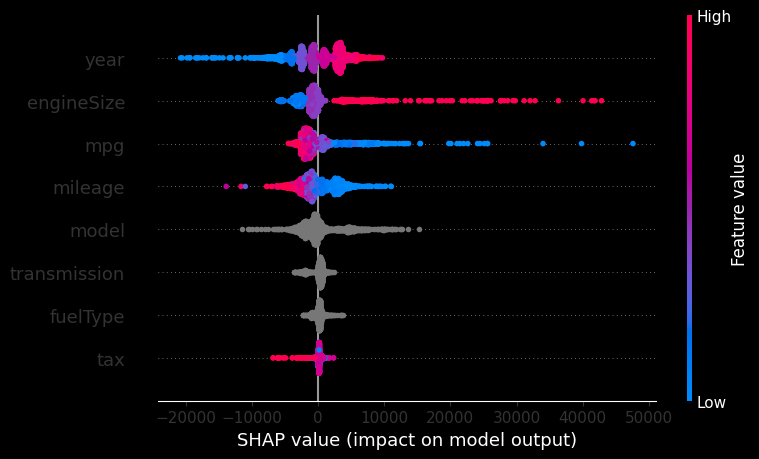

In [620]:
shap.summary_plot(shap_values, test[X])

In [621]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

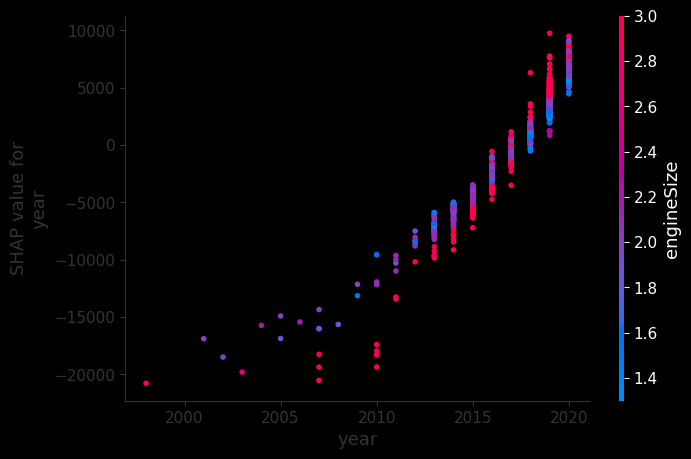

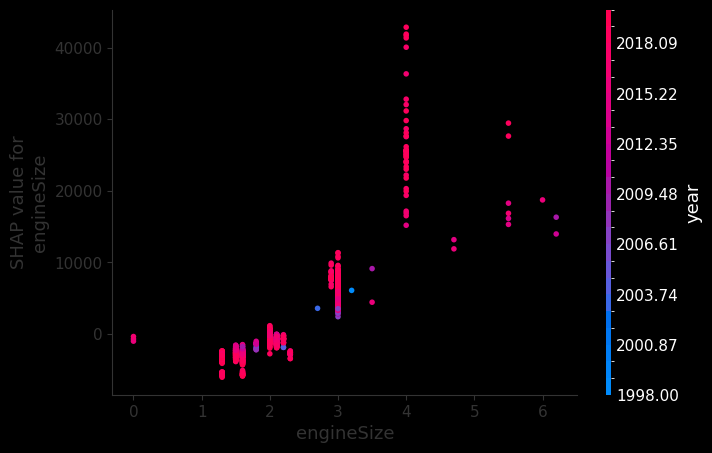

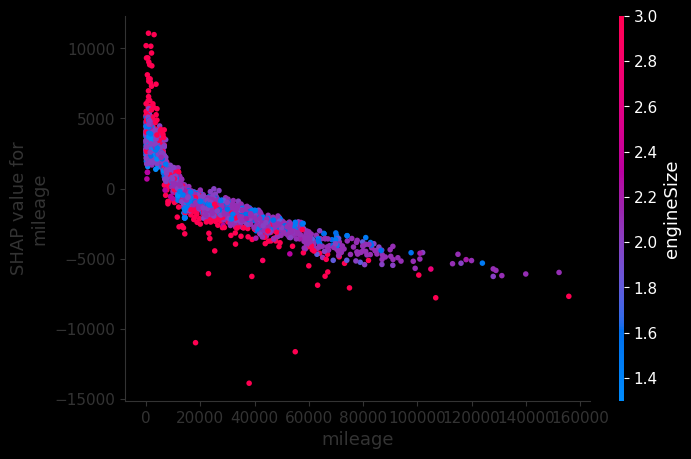

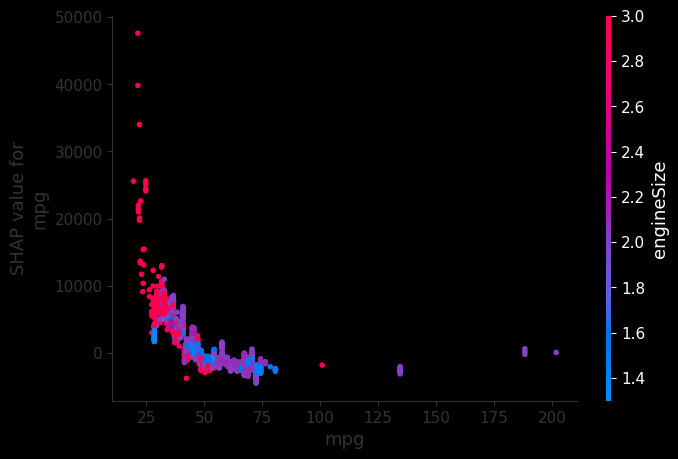

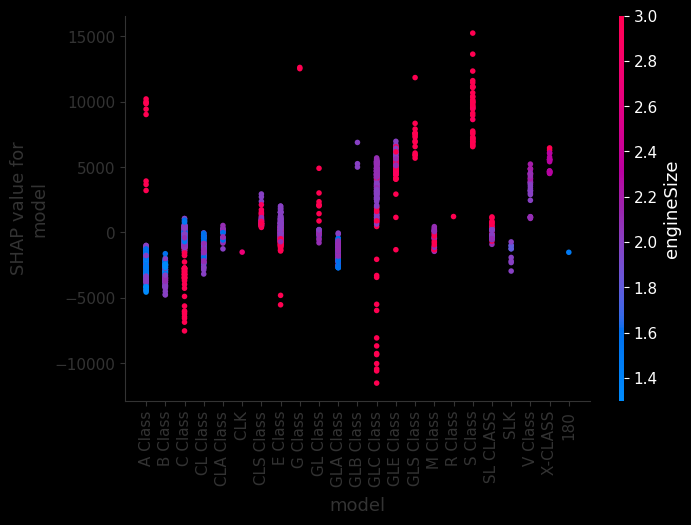

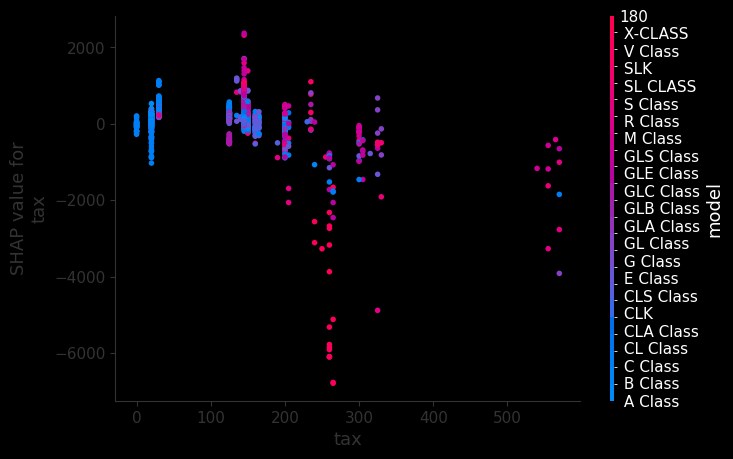

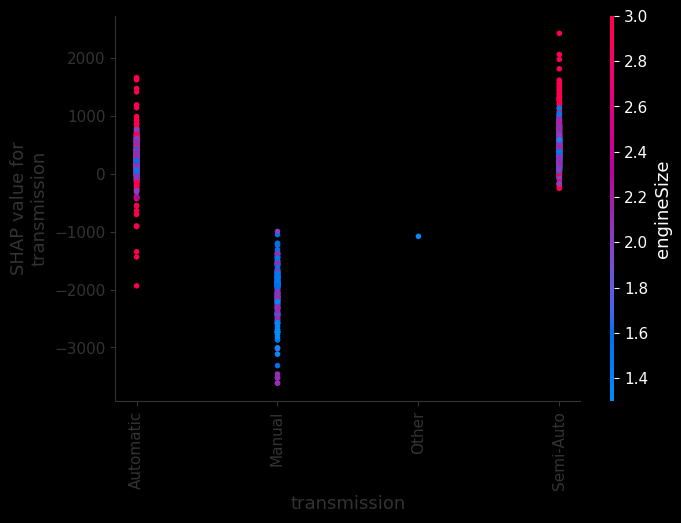

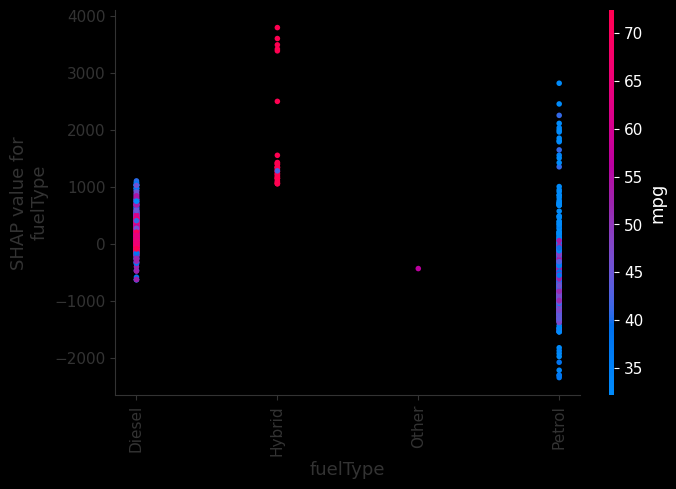

In [622]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])